In [1]:
"""
Hitters dataset Salary component analysis,model used Ridge and Lasso regression
Libraries used - Scikit-learn, Pandas, matplotlib
Problem - Prediction of the Salary variable on the unseen categorical data points
Solution -  Applying Ridge and Lasso regression to predict.
How Ridge regression differ from Lasso is explained in the implentation
"""

'\nHitters dataset Salary component analysis,model used Ridge and Lasso regression\nLibraries used - Scikit-learn, Pandas, matplotlib\nProblem - Prediction of the Salary variable on the unseen categorical data points\nSolution -  Applying Ridge and Lasso regression to predict.\nHow Ridge regression differ from Lasso is explained in the implentation\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.metrics import mean_squared_error


In [4]:
# Loading of Data
data = pd.read_csv("Hitters.csv")
print(data.shape)
print(data.head())

(322, 20)
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


In [6]:
# Data Preparation
# Removing the missing values
data = data.dropna()
print(data.describe())

            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  263.000000    263.000000   263.000000  263.000000   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544   361.220532   
std      4.793616   2286.582929   648.199644   82.1

In [9]:
# Getting Dummies for Object/Categorical datatype
# Converting categorical variable into Dummy/Indicator variables
dummies = pd.get_dummies(data[['League','Division','NewLeague']])

In [10]:
# Defining salary as the response variable
y = data.Salary


In [11]:
# Preparing predictor variables
# Dropping  Salary column and dummy variable created columns
X_temp = data.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
# Concatenating all the X variables
X = pd.concat([X_temp,dummies[['League_N', 'Division_W','NewLeague_N']]],axis=1)


In [12]:
# Ridge regression uses alpha argument to tune the model. Below steps would generate alpha ranging from small 
# value to high,covering all scenarios, null model to least square fit.
# creating 100 values of alpha smallest value to big values.

alphas = 10**np.linspace(10, -2, 100) * 0.5

# 100 alphas values range. Printing first value and last value
print("alpha 1st value = {},".format(alphas[0]), "alpha last value={}".format(alphas[-1]))


alpha 1st value = 5000000000.0, alpha last value=0.005


In [13]:
# Standardize the variables to bring them on same scale
ridge = Ridge(normalize=True)
coeff = []
# Assigning 100 alpha value to each X,Y
for i in alphas:
    ridge.set_params(alpha = i)
    ridge.fit(X,y)
    coeff.append(ridge.coef_)

np.shape(coeff)

(100, 19)

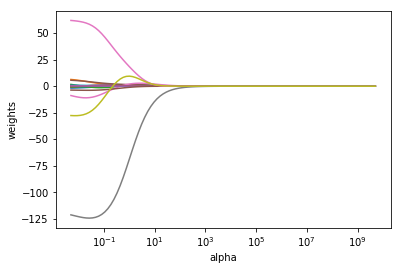

In [14]:
# plotting alpha value
ax = plt.gca()
ax.plot(alphas, coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [15]:
# Split data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=1)

In [19]:
# Let's randomly choose alpha = 3. Our target is to make the coeff value 
# almost zero. Higher the number of coeff nearing 0 better is the alpha selected 

In [16]:
# Fitting ridge regression model on the training set, and evaluate its MSE on the test set result, when alpha=3
ridge2 = Ridge(alpha=3,normalize=True)
ridge2.fit(X_train,y_train)
pred2 = ridge2.predict(X_test)
print(pd.Series(ridge2.coef_,index= X.columns))
print("Alpha={0},MSE={1:9.2f}".format(4,mean_squared_error(y_test,pred2)))

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64
Alpha=4,MSE=106216.52


In [20]:
# Checking the coeff values when Alpha=10**10 (Biggest alpha selected) 

In [21]:
# result when alpha = 10**10
ridge3 = Ridge(alpha=10**10,normalize=True)
ridge3.fit(X_train,y_train)
pred3 = ridge3.predict(X_test)
print(pd.Series(ridge3.coef_,index= X.columns))
print("Alpha={0},MSE={1:9.2f}".format(10**10,mean_squared_error(y_test,pred3)))

AtBat          1.317464e-10
Hits           4.647486e-10
HmRun          2.079865e-09
Runs           7.726175e-10
RBI            9.390640e-10
Walks          9.769219e-10
Years          3.961442e-09
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRuns          8.245247e-11
CRBI           7.795451e-11
CWalks         9.894387e-11
PutOuts        7.268991e-11
Assists       -2.615885e-12
Errors         2.084514e-10
League_N      -2.501281e-09
Division_W    -1.549951e-08
NewLeague_N   -2.023196e-09
dtype: float64
Alpha=10000000000,MSE=172862.24


In [22]:
# Neither of the alpha values is giving best results.
# Let's check what is the result for least square fit.Alpha =0 

In [23]:
# Result when alpha = 0  -- Least square fit
ridge4 = Ridge(alpha=0,normalize=True)
ridge4.fit(X_train,y_train)
pred4 = ridge4.predict(X_test)
print(pd.Series(ridge4.coef_,index= X.columns))
print("Alpha={0},MSE={1:9.2f}".format(0,mean_squared_error(y_test,pred4)))

AtBat           -1.821115
Hits             4.259156
HmRun           -4.773401
Runs            -0.038760
RBI              3.984578
Walks            3.470126
Years            9.498236
CAtBat          -0.605129
CHits            2.174979
CHmRun           2.979306
CRuns            0.266356
CRBI            -0.598456
CWalks           0.171383
PutOuts          0.421063
Assists          0.464379
Errors          -6.024576
League_N       133.743163
Division_W    -113.743875
NewLeague_N    -81.927763
dtype: float64
Alpha=0,MSE=116690.47


In [24]:
# Choosing Cross-Validation method to to find the best alpha fit

In [26]:
# Selecting best alpha using ridge Cross-validation method
ridgeCV = RidgeCV(alphas=alphas,scoring='neg_mean_squared_error',normalize=True)
ridgeCV.fit(X_train,y_train)
print(ridgeCV.alpha_)

0.5748784976988678


In [28]:
# Now we can see the aplha found by using cross-validation method fits better.Many of the coeff have neared to 0 value.
# This shows that we have achieved a maximum reduction in variance

In [27]:
# Result using Cross validation alpha = 0.57
ridge5 = Ridge(alpha = ridgeCV.alpha_, normalize=True)
ridge5.fit(X_train,y_train)
pred5 = ridge5.predict(X_test)
print(pd.Series(ridge5.coef_,index= X.columns))
print("Alpha={0},MSE={1:9.2f}".format(ridgeCV.alpha_,mean_squared_error(y_test,pred5)))

AtBat          -0.013534
Hits            0.864143
HmRun          -0.291615
Runs            0.721999
RBI             1.318149
Walks           2.092914
Years           1.200022
CAtBat          0.006651
CHits           0.052020
CHmRun          0.513053
CRuns           0.106745
CRBI            0.128286
CWalks          0.098953
PutOuts         0.280247
Assists        -0.017241
Errors         -0.315756
League_N       18.915652
Division_W    -92.175508
NewLeague_N     9.936172
dtype: float64
Alpha=0.5748784976988678,MSE= 99825.65


In [29]:
# So Cross validation alpha is showing the best result
# Deducing  many coeff to 0 than the alpha value with 4 or 0 or etc
ridge5.fit(X,y)
pd.Series(ridgeCV.coef_,index = X.columns)

AtBat          -0.013534
Hits            0.864143
HmRun          -0.291615
Runs            0.721999
RBI             1.318149
Walks           2.092914
Years           1.200022
CAtBat          0.006651
CHits           0.052020
CHmRun          0.513053
CRuns           0.106745
CRBI            0.128286
CWalks          0.098953
PutOuts         0.280247
Assists        -0.017241
Errors         -0.315756
League_N       18.915652
Division_W    -92.175508
NewLeague_N     9.936172
dtype: float64

In [31]:
# ----------------------------------------------------------------------------------------------------
# LASSO
# The main difference with lasso w.r.t ridge is it enforces the unimportant coeff to 0,
# without considering them into formula.
# Lasso is used when data points are making large impact on variable Y,in comparision with other variables.
# Ridge is used when data points are making smaller impact on variable Y,hence considers all the variables.
# -------------------------------------------------------------------------------------------------------------

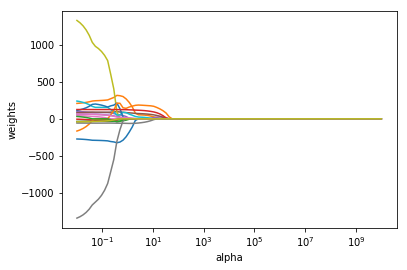

In [32]:
# Defining lasso with 10,000 iterations for K-fold
lasso = Lasso(max_iter = 10000,normalize=True)
coeff = []
# Assigning alpha to scaled X and y training data
for i in alphas:
    lasso.set_params(alpha = i)
    lasso.fit(scale(X_train),y_train)
    coeff.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2,coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [35]:
# Below output would shows that the Lasso has straight away made the coeff to 0 or didn't consider at all. 13 coefficients has the value 0, which it 
# considers as unimportant

In [34]:
# Determining best alpha from Cross-validation method
lassocv = LassoCV(alphas =None,cv=10,max_iter = 100000,normalize = True)
lassocv.fit(X_train,y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)
pred = lasso.predict(X_test)
mean_squared_error(y_test,pred)
print(pd.Series(lassocv.coef_,index=X.columns))

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64


In [38]:
# Conclusion: Salary component depends on the coefficients which is showing the# higher coefficients value.A non-zero values. Higher the coefficient value 
# larger is it's impact on Salary Component Y